In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import seaborn as sns


# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("exoplanet_data.csv")
#Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0.0,0.0,0.0,0.0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0.0,1.0,0.0,0.0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0.0,1.0,0.0,0.0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0.0,0.0,0.0,0.0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0.0,0.0,0.0,0.0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,FALSE POSITIVE,0.0,0.0,0.0,1.0,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,...,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
6987,FALSE POSITIVE,0.0,1.0,1.0,0.0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
6988,CANDIDATE,0.0,0.0,0.0,0.0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
6989,FALSE POSITIVE,0.0,0.0,1.0,0.0,0.681402,2.430000e-06,-2.430000e-06,132.181750,0.002850,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


In [5]:
# For this model we need to predict two labels: PLANET and NOT PLANET 
# It means we should transform our y (labeled depdendent variable so as to get PLANET = 1 and NOT PLANET = 0 )
# For this we should consider FALSE POSITIVE as a NOT PLANET and CANDIDATE as also a NOT PLANET
# so what is the probability of having a PLANET or not?
# Here predicting a binary outputs from data, it makes more sense to a Logistic regression model.
# lets get a dummy variable
df2 = pd.get_dummies(df, columns=["koi_disposition"])
df2

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,koi_disposition_CANDIDATE,koi_disposition_CONFIRMED,koi_disposition_FALSE POSITIVE
0,0.0,0.0,0.0,0.0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,0,1,0
1,0.0,1.0,0.0,0.0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,...,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,0,0,1
2,0.0,1.0,0.0,0.0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,0,0,1
3,0.0,0.0,0.0,0.0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,...,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,0,1,0
4,0.0,0.0,0.0,0.0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,...,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,0.0,0.0,0.0,1.0,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,-0.015700,...,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478,0,0,1
6987,0.0,1.0,1.0,0.0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,-0.000170,...,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082,0,0,1
6988,0.0,0.0,0.0,0.0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,-0.007690,...,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757,1,0,0
6989,0.0,0.0,1.0,0.0,0.681402,2.430000e-06,-2.430000e-06,132.181750,0.002850,-0.002850,...,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385,0,0,1


# Select your features (columns)

In [6]:
# Assign data to X 
# Sklearn requieres two dimensional array values
# So we use reshape to crete it
# Set features. This will also be used as your x values.
X = df[['koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_time0bk', 'koi_impact', 'koi_duration']]
X

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration
0,0.0,0.0,0.0,0.0,54.418383,162.513840,0.586,4.50700
1,0.0,1.0,0.0,0.0,19.899140,175.850252,0.969,1.78220
2,0.0,1.0,0.0,0.0,1.736952,170.307565,1.276,2.40641
3,0.0,0.0,0.0,0.0,2.525592,171.595550,0.701,1.65450
4,0.0,0.0,0.0,0.0,4.134435,172.979370,0.762,3.14020
...,...,...,...,...,...,...,...,...
6986,0.0,0.0,0.0,1.0,8.589871,132.016100,0.765,4.80600
6987,0.0,1.0,1.0,0.0,0.527699,131.705093,1.252,3.22210
6988,0.0,0.0,0.0,0.0,1.739849,133.001270,0.043,3.11400
6989,0.0,0.0,1.0,0.0,0.681402,132.181750,0.147,0.86500



# Defining the Target

In [7]:
y = df["koi_disposition"]
y

0            CONFIRMED
1       FALSE POSITIVE
2       FALSE POSITIVE
3            CONFIRMED
4            CONFIRMED
             ...      
6986    FALSE POSITIVE
6987    FALSE POSITIVE
6988         CANDIDATE
6989    FALSE POSITIVE
6990    FALSE POSITIVE
Name: koi_disposition, Length: 6991, dtype: object

# Create a Train Test Split

Use `koi_disposition` for the y values

In [8]:
# label = koi_disposition
# inputs = 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_time0bk', 'koi_impact', 'koi_duration'
# before of training test split lets make a normalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [9]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration
6122,0.0,0.0,0.0,0.0,6.768901,133.077240,0.150,3.61600
6370,0.0,1.0,0.0,1.0,0.733726,132.020050,0.291,2.30900
2879,1.0,0.0,0.0,0.0,7.652707,134.460380,0.970,79.89690
107,0.0,0.0,0.0,0.0,7.953547,174.662240,0.300,2.63120
29,0.0,0.0,0.0,0.0,4.959319,172.258529,0.831,2.22739


In [10]:
# confirm the shape of features matrix and target array
print(X.shape, y.shape)

(6991, 8) (6991,)


# A quick exploration of every input

In [11]:
df.describe()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6.991000e+03,6.991000e+03,6991.000000,6991.000000,6991.000000,...,6991.000000,6991.000000,6991.000000,6991.00000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000,6991.000000
mean,0.157059,0.244743,0.202975,0.125018,56.191248,1.851122e-03,-1.851122e-03,164.488820,0.009340,-0.009340,...,-161.206980,4.305049,0.121091,-0.14048,1.740749,0.352710,-0.388568,292.082406,43.812143,14.271508
std,0.363882,0.429966,0.402243,0.330763,117.570962,7.184503e-03,7.184503e-03,67.020475,0.021989,0.021989,...,71.448481,0.439238,0.132048,0.08199,5.903415,0.839017,1.907797,4.762908,3.606167,1.350802
min,0.000000,0.000000,0.000000,0.000000,0.259820,1.100000e-08,-1.568000e-01,120.515914,0.000009,-0.569000,...,-1733.000000,0.047000,0.000000,-1.00700,0.109000,0.000000,-103.825000,279.856080,36.577381,6.966000
25%,0.000000,0.000000,0.000000,0.000000,2.620126,5.005000e-06,-2.401000e-04,132.683917,0.001145,-0.010000,...,-197.000000,4.209000,0.044000,-0.19500,0.829000,0.128000,-0.252000,288.704730,40.797760,13.455000
50%,0.000000,0.000000,0.000000,0.000000,8.947426,3.300000e-05,-3.300000e-05,136.739230,0.003990,-0.003990,...,-159.000000,4.436000,0.070000,-0.12700,0.999000,0.248000,-0.111000,292.314760,43.679661,14.534000
75%,0.000000,0.000000,0.000000,0.000000,34.282605,2.401000e-04,-5.005000e-06,169.937005,0.010000,-0.001145,...,-112.000000,4.543000,0.149000,-0.08800,1.357000,0.357000,-0.069000,295.888550,46.693659,15.322000
max,1.000000,1.000000,1.000000,1.000000,1071.232624,1.568000e-01,-1.100000e-08,1472.522306,0.569000,-0.000009,...,0.000000,5.364000,1.472000,0.00000,180.013000,25.956000,0.000000,301.720760,52.336010,19.065000


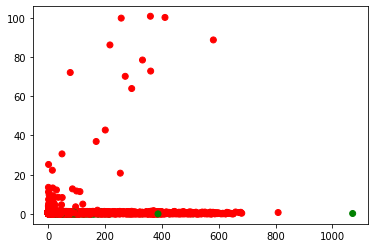

In [101]:
# making a visualization (at first glance we need a normalizaton)
colors = {1:"green", 0:"red"}
plt.scatter(df2["koi_period"], df2["koi_impact"], c=df2["koi_disposition_CONFIRMED"].map(colors))

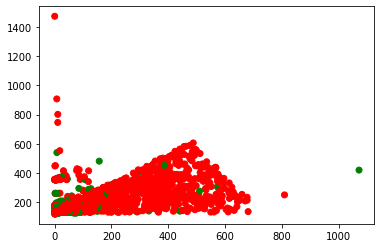

In [103]:
# making a visualization
colors = {1:"green", 0:"red"}
plt.scatter(df2["koi_period"], df2["koi_time0bk"], c=df2["koi_disposition_CONFIRMED"].map(colors))

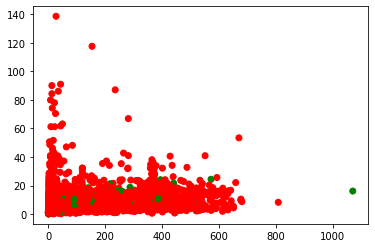

In [104]:
# making a visualization
colors = {1:"green", 0:"red"}
plt.scatter(df2["koi_period"], df2["koi_duration"], c=df2["koi_disposition_CONFIRMED"].map(colors))

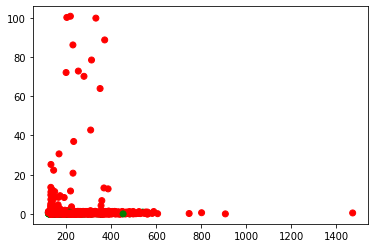

In [105]:
# making a visualization
colors = {1:"green", 0:"red"}
plt.scatter(df2["koi_time0bk"], df2["koi_impact"], c=df2["koi_disposition_CONFIRMED"].map(colors))

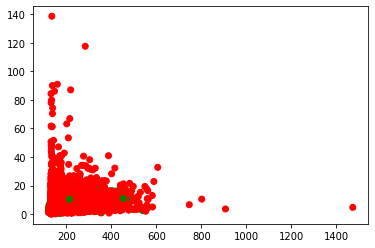

In [106]:
# making a visualization
colors = {1:"green", 0:"red"}
plt.scatter(df2["koi_time0bk"], df2["koi_duration"], c=df2["koi_disposition_CONFIRMED"].map(colors))

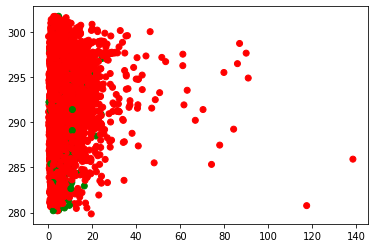

In [108]:
# making a visualization
colors = {1:"green", 0:"red"}
plt.scatter(df2["koi_duration"], df2["ra"], c=df2["koi_disposition_CONFIRMED"].map(colors))

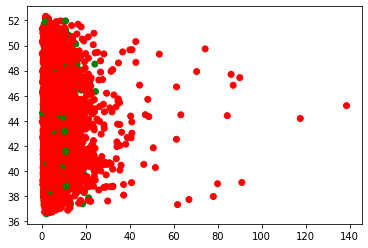

In [109]:
# making a visualization
colors = {1:"green", 0:"red"}
plt.scatter(df2["koi_duration"], df2["dec"], c=df2["koi_disposition_CONFIRMED"].map(colors))

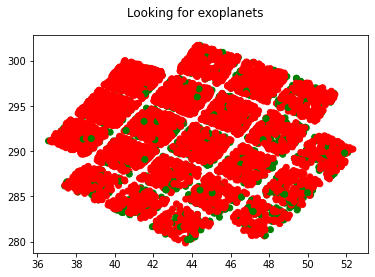

In [13]:
# making a visualization, this is an interesting relationship. Is this feasible with a gridsearch model
colors = {1:"green", 0:"red"}
plt.scatter(df2["dec"], df2["ra"], c=df2["koi_disposition_CONFIRMED"].map(colors))
plt.suptitle("Looking for exoplanets")
plt.savefig("presentationGuarneros.png")


# Logistic Regression Model

In [14]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=1000) # default iterations are 100 and the model is able to improbe with more iterations
classifier

LogisticRegression(max_iter=1000)

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [15]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
# Scaling data (normalizing)
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Label encode data
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)


In [16]:
np.unique(y_train)

array(['CANDIDATE', 'CONFIRMED', 'FALSE POSITIVE'], dtype=object)

# Train the Model



In [17]:
model = classifier.fit(X_train, encoded_y_train)
predictions = model.predict(X_test_scaled)
print(f'The first 10 predictions: {predictions[:10]}')
print(f'The first 10 actual values: {encoded_y_test[:10].tolist()}')

print(f"Training Data Score: {model.score(X_train_scaled, encoded_y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, encoded_y_test)}")

The first 10 predictions: [2 0 2 2 2 0 0 0 0 2]
The first 10 actual values: [2, 0, 2, 2, 2, 1, 0, 0, 0, 2]
Training Data Score: 0.7451840549303834
Testing Data Score: 0.7185354691075515


In [18]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(encoded_y_test, predictions, 
                           target_names = ["CONFIRMED", "FALSE POSITIVE", "CANDIDATE"]))

                precision    recall  f1-score   support

     CONFIRMED       0.46      0.99      0.63       411
FALSE POSITIVE       0.00      0.00      0.00       484
     CANDIDATE       0.98      1.00      0.99       853

      accuracy                           0.72      1748
     macro avg       0.48      0.66      0.54      1748
  weighted avg       0.59      0.72      0.63      1748



d:\users\rodrigo.guarneros.ift\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(encoded_y_test, predictions)

array([[405,   0,   6],
       [473,   0,  11],
       [  2,   0, 851]], dtype=int64)

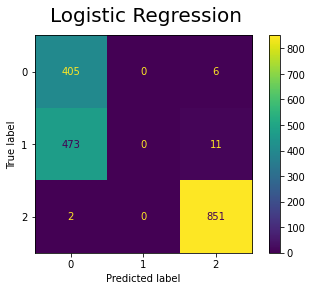

In [20]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test_scaled, encoded_y_test)
plt.suptitle('Logistic Regression', fontsize=20)
plt.savefig('LogisticGuarneros.png')

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [22]:
# Create the GridSearchCV model
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [10, 50, 100],
              'max_iter': [200, 500, 1000]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [23]:
# Train the model with GridSearch
grid.fit(X_train_scaled, encoded_y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=10, max_iter=200 ..............................................
[CV] .................. C=10, max_iter=200, score=0.788, total=   0.1s
[CV] C=10, max_iter=200 ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................. C=10, max_iter=200, score=0.800, total=   0.1s
[CV] C=10, max_iter=200 ..............................................
[CV] .................. C=10, max_iter=200, score=0.776, total=   0.1s
[CV] C=10, max_iter=200 ..............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] .................. C=10, max_iter=200, score=0.785, total=   0.1s
[CV] C=10, max_iter=200 ..............................................
[CV] .................. C=10, max_iter=200, score=0.777, total=   0.1s
[CV] C=10, max_iter=500 ..............................................
[CV] .................. C=10, max_iter=500, score=0.788, total=   0.1s
[CV] C=10, max_iter=500 ..............................................
[CV] .................. C=10, max_iter=500, score=0.800, total=   0.1s
[CV] C=10, max_iter=500 ..............................................
[CV] .................. C=10, max_iter=500, score=0.776, total=   0.2s
[CV] C=10, max_iter=500 ..............................................
[CV] .................. C=10, max_iter=500, score=0.785, total=   0.1s
[CV] C=10, max_iter=500 ..............................................
[CV] .................. C=10, max_iter=500, score=0.777, total=   0.1s
[CV] C=10, max_iter=1000 .............................................
[CV] .

d:\users\rodrigo.guarneros.ift\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] .................. C=50, max_iter=200, score=0.795, total=   0.3s
[CV] C=50, max_iter=200 ..............................................
[CV] .................. C=50, max_iter=200, score=0.806, total=   0.2s
[CV] C=50, max_iter=200 ..............................................
[CV] .................. C=50, max_iter=200, score=0.781, total=   0.2s
[CV] C=50, max_iter=200 ..............................................
[CV] .................. C=50, max_iter=200, score=0.787, total=   0.3s
[CV] C=50, max_iter=200 ..............................................


d:\users\rodrigo.guarneros.ift\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] .................. C=50, max_iter=200, score=0.773, total=   0.3s
[CV] C=50, max_iter=500 ..............................................
[CV] .................. C=50, max_iter=500, score=0.795, total=   0.3s
[CV] C=50, max_iter=500 ..............................................
[CV] .................. C=50, max_iter=500, score=0.806, total=   0.2s
[CV] C=50, max_iter=500 ..............................................
[CV] .................. C=50, max_iter=500, score=0.781, total=   0.2s
[CV] C=50, max_iter=500 ..............................................
[CV] .................. C=50, max_iter=500, score=0.787, total=   0.3s
[CV] C=50, max_iter=500 ..............................................
[CV] .................. C=50, max_iter=500, score=0.773, total=   0.3s
[CV] C=50, max_iter=1000 .............................................
[CV] ................. C=50, max_iter=1000, score=0.795, total=   0.3s
[CV] C=50, max_iter=1000 .............................................
[CV] .

d:\users\rodrigo.guarneros.ift\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................. C=100, max_iter=200, score=0.798, total=   0.3s
[CV] C=100, max_iter=200 .............................................
[CV] ................. C=100, max_iter=200, score=0.798, total=   0.4s
[CV] C=100, max_iter=200 .............................................


d:\users\rodrigo.guarneros.ift\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................. C=100, max_iter=200, score=0.787, total=   0.3s
[CV] C=100, max_iter=200 .............................................
[CV] ................. C=100, max_iter=200, score=0.790, total=   0.3s
[CV] C=100, max_iter=200 .............................................


d:\users\rodrigo.guarneros.ift\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[CV] ................. C=100, max_iter=200, score=0.777, total=   0.3s
[CV] C=100, max_iter=500 .............................................
[CV] ................. C=100, max_iter=500, score=0.797, total=   0.3s
[CV] C=100, max_iter=500 .............................................
[CV] ................. C=100, max_iter=500, score=0.798, total=   0.3s
[CV] C=100, max_iter=500 .............................................
[CV] ................. C=100, max_iter=500, score=0.788, total=   0.3s
[CV] C=100, max_iter=500 .............................................
[CV] ................. C=100, max_iter=500, score=0.790, total=   0.3s
[CV] C=100, max_iter=500 .............................................
[CV] ................. C=100, max_iter=500, score=0.777, total=   0.3s
[CV] C=100, max_iter=1000 ............................................
[CV] ................ C=100, max_iter=1000, score=0.797, total=   0.3s
[CV] C=100, max_iter=1000 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   10.3s finished
d:\users\rodrigo.guarneros.ift\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [10, 50, 100], 'max_iter': [200, 500, 1000]},
             verbose=3)

In [39]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 100, 'max_iter': 200}
0.7900032018862021


In [24]:
best_predict = grid.predict(X_test)

In [25]:
print(classification_report(encoded_y_test, best_predict,
                           target_names = ["Confirmed", "False Positive", "Candidate"]))

                precision    recall  f1-score   support

     Confirmed       0.00      0.00      0.00       411
False Positive       0.30      0.76      0.43       484
     Candidate       0.49      0.31      0.38       853

      accuracy                           0.36      1748
     macro avg       0.26      0.35      0.27      1748
  weighted avg       0.32      0.36      0.30      1748



d:\users\rodrigo.guarneros.ift\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Save the Model

In [26]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'logistic_model.sav'
joblib.dump(model, filename)

['logistic_model.sav']